In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt

In [44]:
class VideoProcessor:
    def extract_all_frames(self, filename):
        frames = []
        v_cap = cv2.VideoCapture(filename)
        
        while True:
            ret, frame = v_cap.read()
        
            if ret != True:
                break
             
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2HSV))
        
        v_cap.release()
        
        cv2.destroyAllWindows() 
        return frames

In [3]:
df = pd.DataFrame()
for root, dirs, files in os.walk('../videos', topdown=False):
    for name in dirs:
        print(name)
        dfdir = pd.read_json('../videos/' + name + '/metadata.json')
        dfdir = dfdir.T
        dfdir['dir'] = name
        df = df.append(dfdir)
df["name"] = df.index
df["processed"] = 'False'

dfdc_train_part_21
dfdc_train_part_20
dfdc_train_part_14
dfdc_train_part_48
dfdc_train_part_3
dfdc_train_part_2


In [45]:
vp = VideoProcessor()

In [31]:
row = df.query('label == "FAKE"').sample(100).iloc[0]
row

label                     FAKE
original        gjasrapdle.mp4
split                    train
dir          dfdc_train_part_3
name            dwdsqjvuch.mp4
processed                False
Name: dwdsqjvuch.mp4, dtype: object

In [46]:
for index, row in df.query('label == "FAKE"').sample(100).iterrows():
    file = '../videos/' + row.dir + '/'+ row.name
    print(file)
    framesFAKE = vp.extract_all_frames(file)
    file = '../videos/' + row.dir + '/' + row.original
    print(file)
    framesREAL = vp.extract_all_frames(file)
    for ff, fr in zip(framesFAKE,framesREAL):
        if np.array_equal(ff,fr):
            print('Bingo!!!')
            break

../videos/dfdc_train_part_21/upcivrlmjs.mp4
../videos/dfdc_train_part_21/hdckmfvpof.mp4
../videos/dfdc_train_part_20/kcwsvbnjmr.mp4
../videos/dfdc_train_part_20/flxkagsdek.mp4
../videos/dfdc_train_part_48/gvyvbdlfap.mp4
../videos/dfdc_train_part_48/rjzvgihmuu.mp4
../videos/dfdc_train_part_2/oredhzwztp.mp4
../videos/dfdc_train_part_2/btdxnajogv.mp4
../videos/dfdc_train_part_20/ypfigpdppq.mp4
../videos/dfdc_train_part_20/lnffehsqwd.mp4
../videos/dfdc_train_part_14/pgymygjkvg.mp4
../videos/dfdc_train_part_14/kysghtqyes.mp4
../videos/dfdc_train_part_20/pgvgeizpmw.mp4
../videos/dfdc_train_part_20/hmrnzlidph.mp4
../videos/dfdc_train_part_20/wtmhjldbti.mp4
../videos/dfdc_train_part_20/ippnanamvr.mp4
../videos/dfdc_train_part_48/npdomfybya.mp4
../videos/dfdc_train_part_48/mffbrshfnj.mp4
../videos/dfdc_train_part_2/yhyzylsuxz.mp4
../videos/dfdc_train_part_2/novarhxpbj.mp4
../videos/dfdc_train_part_21/xvhqpznppn.mp4
../videos/dfdc_train_part_21/ptwlgtvhmt.mp4
../videos/dfdc_train_part_21/vtbtthu

KeyboardInterrupt: 

In [47]:
len(framesFAKE), len(framesREAL)

(300, 300)

In [48]:
np.array_equal(framesFAKE[0],framesREAL[0])

False

In [49]:
ff.shape, fr.shape

((1080, 1920, 3), (1080, 1920, 3))

In [50]:
r = (ff == fr)
r

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       ...,

       [[False,  True, False],
        [False,  True, False],
        [False,  True, False],
        ...,
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[False,  True, False],
        [False,  True, False],
        [False,  True, False],
        ...,
        [False, False,  True],
        [False, False,  True],
        [False,

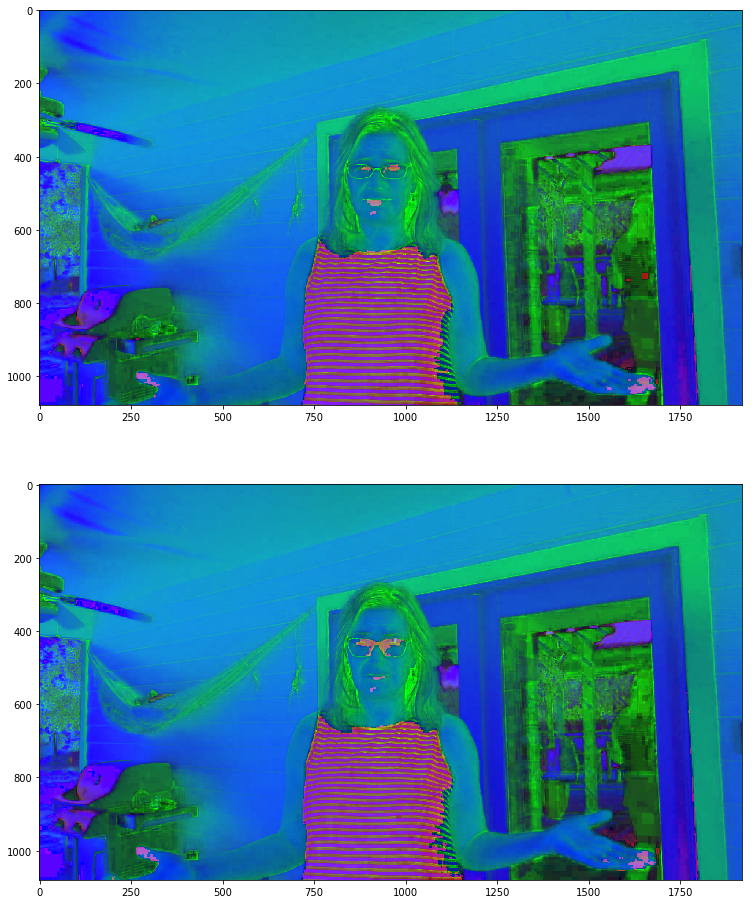

In [51]:
fig, (axf,axr) = plt.subplots(2,1, figsize=(16,16))
axf.imshow(framesFAKE[0])
axr.imshow(framesREAL[0])
plt.show()

In [52]:
cv2.destroyAllWindows() 

In [53]:
!ffmpeg

/bin/sh: 1: ffmpeg: not found
